<a href="https://colab.research.google.com/github/ianog88/Statistics_DataScience/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Evidence for Actor Critic Model
This notebook highlights the statistical characteristics of financial time series that motivated my choice of the actor critic model. Specifically the non-stationary, non-normal and complex depeendencies present in the data suggest that a non-linear and flexible learning method may have potential for forecasting price returns

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import scipy.optimize as spop

from statsmodels.tsa.stattools import adfuller

In [7]:
df = yf.download("AAPL", start="2013-01-01", end="2023-01-01")
df = df.reset_index()
df['return'] = df['Close'].pct_change()
df = df.dropna()

[*********************100%%**********************]  1 of 1 completed


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,return
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.513935,352965200,-0.012622
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.053938,594333600,-0.027855
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,15.959502,484156400,-0.005882
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.002459,458707200,0.002691
5,2013-01-09,18.660713,18.750357,18.428213,18.467857,15.752360,407604400,-0.015629


# Non-Stationary
The chart below highlights the presense of volatility clusters and hence suggests the time series is non-stationary

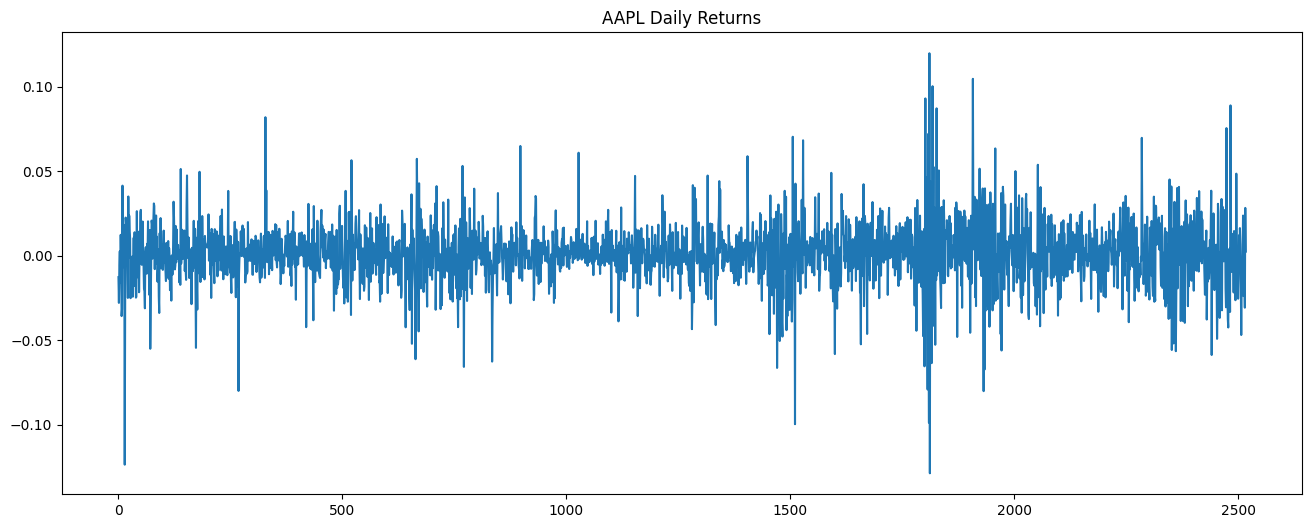

In [9]:
plt.figure(figsize=(16,6))
plt.plot(df['return'])
plt.title("AAPL Daily Returns")
plt.show()

# Non-Normal
The shapiro wilk test for normality returns a p value of 0.000

In [25]:
from scipy.stats import shapiro

stat, p = shapiro(df['return'])
print('Statistic = %.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample follows Normal Dsitribution (fail to reject H0)')
else:
 print('Sample does not follow Normal Dsitribution (reject H0)')

Statistic=0.939, p=0.000
Sample does not follow Normal Dsitribution (reject H0)


In [11]:
from scipy.stats import norm

returns = df['return']

mean = np.average(returns)
std = np.std(returns)
returns = np.sort(returns)
y_array = norm.pdf(returns, mean, std)

In [13]:
from scipy.stats import johnsonsu

a1, b1, loc1, scale1 = johnsonsu.fit(returns)

y_arr = johnsonsu.pdf(returns, a1, b1, loc1, scale1)

# Graphical Evidence of Non-Normality
The chart below compares the fitted normal distribution (orange) and the fitted Johnson SU distribution (blue). The Johnson SU distribution is a transformation of the normal distribution. It is a four-parametric distribution with parameters for the skewness and tail weight. The clear improvements seen when using the Johnson SU distribution highlight the non-normality of financial time series

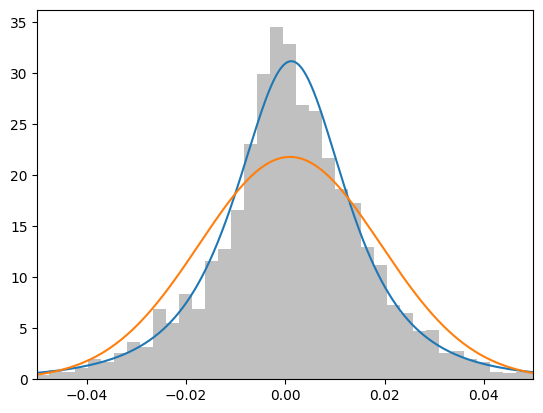

In [14]:
plt.plot(returns, y_arr)
plt.plot(returns, y_array)
plt.hist(returns, bins='auto', density=True, color='silver')
plt.xlim([-0.05,0.05]);

# Complex Dependencies
Plotting the autocorrelation function of AAPL returns produces the same plot characteristics as the autocorrelation function of independent and identically distributed noise as seen in charts 1.1 and 1.2. However, squaring both series and plotting the ACF highlights the dependencies present in AAPL returns as the square of an independent variable is still independent as seen in the squared IID noise ACF plot. This suggests that there are complex dependencies present in financial time series that cannot be modelling using linear meethods.

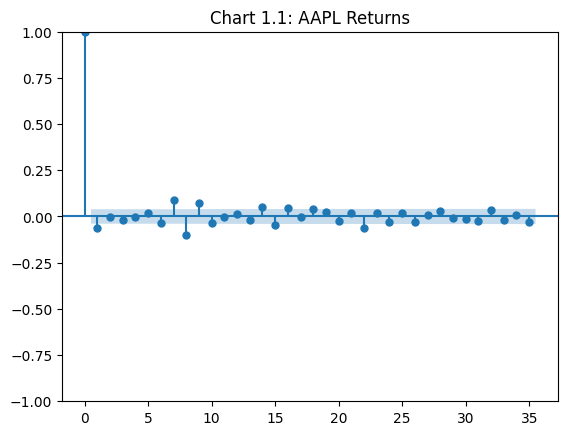

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
series = df['return']
plot_acf(series)
plt.title("Chart 1.1: AAPL Returns")
plt.show()

In [16]:
from random import gauss

noise = []

for i in range(1000):
 noise.append(gauss(0, .014))

In [17]:
noise = pd.Series(noise)

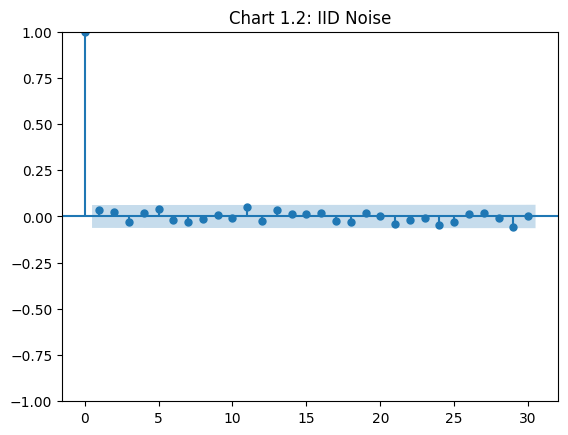

In [28]:
plot_acf(noise)
plt.title("Chart 1.2: IID Noise")
plt.show()

In [21]:
noise_doubled = pd.Series([i * i for i in noise])

In [22]:
series_doubled = pd.Series([i * i for i in series])

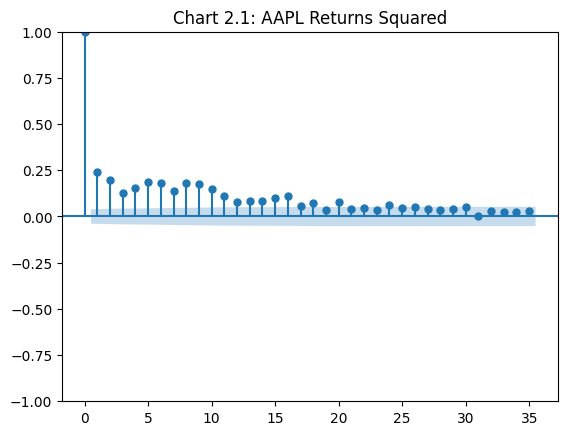

In [29]:
plot_acf(series_doubled)
plt.title("Chart 2.1: AAPL Returns Squared")
plt.show()

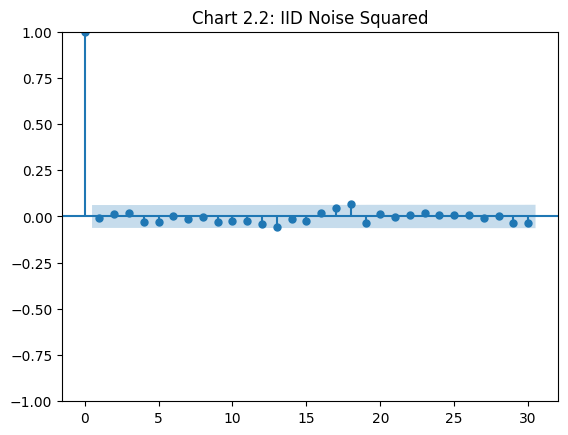

In [30]:
plot_acf(noise_doubled)
plt.title("Chart 2.2: IID Noise Squared")
plt.show()